# Calculate Basin Average Depth Near Peak SWE in the Tuolumne Basin and Methow Valley  
For use in Table 1 of Besso et al., 2023

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats
from scipy import stats
import pickle

In [2]:
%matplotlib inline

In [4]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/IDS_westernUS/SlideRule_tuolumne/notebooks/figure_production


#### Define interquartile range function:

In [3]:
def iqr2(x):
    IQR = stats.iqr(x, interpolation = 'midpoint')
    return IQR

In [4]:
def iqr(p25, p75):
    iqr = p75 - p25
    return iqr

## Calculate Tuolumne Snow Depth

#### Load site outline file:

In [3]:
outline_gdf = pickle.load(open('../../../data/site_outlines/tuolumne_outline_32611.pkl', 'rb'))

#### Calculate stats for 2019:

In [15]:
stats_2019 = zonal_stats(outline_gdf,'../../../data/lidar/tuolumne/snow_on/raw/ASO_3M_SD_USCATE_20190324.tif',
            stats="mean min max median percentile_25 percentile_75 std",
            add_stats={'iqr':iqr})
stats_2019

[{'min': 0.0,
  'max': 24.925031661987305,
  'mean': 2.7457223038256706,
  'std': 1.5775688919995081,
  'median': 2.823103189468384,
  'percentile_25': 1.7708569765090942,
  'percentile_75': 3.651228189468384,
  'iqr': None}]

In [26]:
iqr(stats_2019[0]['percentile_25'], stats_2019[0]['percentile_75'])

1.8803712129592896

#### Calculate stats for 2020:

In [16]:
stats_2020 = zonal_stats(outline_gdf,'../../../data/lidar/tuolumne/snow_on/raw/ASO_Tuolumne_snowdepth_3m_20200413.tif',
            stats="mean min max median percentile_25 percentile_75 std",
                        add_stats={'iqr':iqr})
stats_2020

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


[{'min': -0.0,
  'max': 24.997648239135742,
  'mean': 0.9712311388732052,
  'std': 0.8906892483920672,
  'median': 0.9278247952461243,
  'percentile_25': 0.12550637125968933,
  'percentile_75': 1.4770689010620117,
  'iqr': None}]

In [27]:
iqr(stats_2020[0]['percentile_25'], stats_2020[0]['percentile_75'])

1.3515625298023224

#### Calculate stats for 2021:

In [17]:
stats_2021 = zonal_stats(outline_gdf,'../../../data/lidar/tuolumne/snow_on/raw/ASO_Tuolumne_Mosaic_snowdepth_50m_20210225.tif',
            stats="mean min max median percentile_25 percentile_75 std",
                        add_stats={'iqr':iqr})
stats_2021

[{'min': 0.0,
  'max': 7.849906921386719,
  'mean': 0.9667388331201703,
  'std': 0.5253193560138081,
  'median': 1.046650767326355,
  'percentile_25': 0.6105408668518066,
  'percentile_75': 1.3310670256614685,
  'iqr': None}]

In [28]:
iqr(stats_2021[0]['percentile_25'], stats_2021[0]['percentile_75'])

0.7205261588096619

#### Calculate stats for 2022:

In [18]:
stats_2022 = zonal_stats(outline_gdf,'../../../data/lidar/tuolumne/snow_on/raw/ASO_Tuolumne_Mosaic_snowdepth_3m_20220204.tif',
            stats="mean min max median percentile_25 percentile_75 std",
                        add_stats={'iqr':iqr})
stats_2022

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


[{'min': 0.0,
  'max': 197.1892852783203,
  'mean': 0.967251519388307,
  'std': 0.7145717021040515,
  'median': 0.9796717166900635,
  'percentile_25': 0.4665178656578064,
  'percentile_75': 1.3407869338989258,
  'iqr': None}]

In [29]:
iqr(stats_2022[0]['percentile_25'], stats_2022[0]['percentile_75'])

0.8742690682411194

## Calculate Methow Snow Depth

#### Load site outline file and in situ CSO measurements:

In [77]:
cso = gpd.read_file('../../../data/cso/cso-data_092022.geojson')

In [58]:
methow_outline = gpd.read_file('../../../data/site_outlines/methow_outline.geojson')
methow_outline = methow_outline[3:]

#### Convert CSO snow depth to cm

In [78]:
cso['depth_m'] = cso['depth']/100

In [79]:
cso['timestamp'] = cso['timestamp'].astype(str)

In [80]:
cso['time'] = ''
for i in range(0,127):
    x = datetime.strptime(cso.loc[i,'timestamp'], '%Y-%m-%dT%H:%M:%S.%f%z')
    j = pd.to_datetime(x)
    cso.loc[i,'time'] = j

In [81]:
for i in range(128,148):
    x = datetime.strptime(cso.loc[i,'timestamp'], '%Y-%m-%dT%H:%M:%S%z')
    j = pd.to_datetime(x)
    cso.loc[i,'time'] = j

In [86]:
cso['time'] = pd.to_datetime(cso['time'])

In [63]:
cso.head(2)

,id,author,depth,source,timestamp,elevation,_ms,geometry,depth_m,time
0,gz86+3JP,David Hill,65.000000,MountainHub,2020-12-28T20:32:46.319000+00:00,830.746399,1609187566319,POINT (-120.21671 48.57078),0.65,2020-12-28 20:32:46.319000+00:00
1,Jo5GG2Sw,Bob Sutherland,49.999998,MountainHub,2020-01-23T20:07:28.351999+00:00,679.372925,1579810048352,POINT (-120.15874 48.62850),0.50,2020-01-23 20:07:28.351999+00:00


#### Plot outline and downloaded CSO data:

<AxesSubplot:>

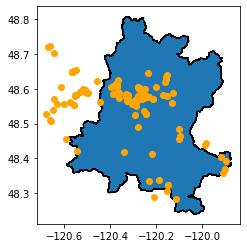

In [34]:
fig, ax = plt.subplots()
methow_outline[3:].plot(facecolor=None, edgecolor='k', ax=ax)
cso.plot(ax=ax, c='orange')

#### Crop CSO data to site outline:

In [88]:
cso_methow = gpd.clip(cso, methow_outline)

<AxesSubplot: >

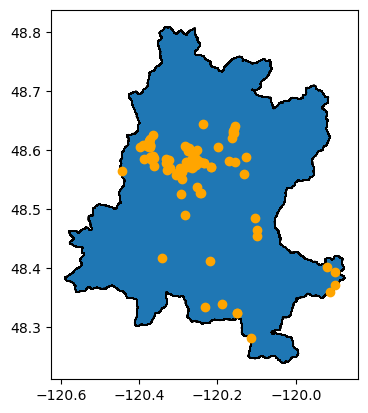

In [10]:
fig, ax = plt.subplots()
methow_outline.plot(facecolor=None, edgecolor='k', ax=ax)
cso_methow.plot(ax=ax, c='orange')

In [89]:
cso = cso.set_index('time')
cso_methow = cso_methow.set_index('time')

<Axes: xlabel='time'>

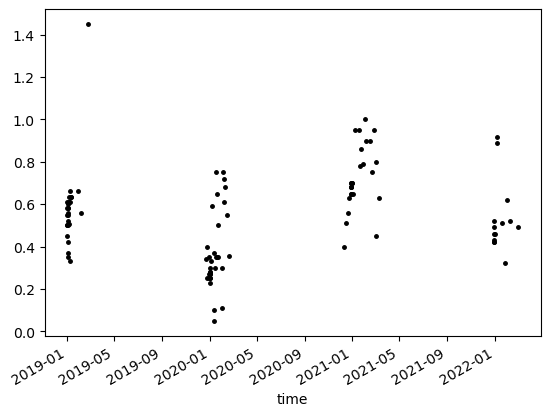

In [91]:
fig, ax = plt.subplots()
cso_methow['depth_m'].plot(ax=ax, linestyle='none', marker='.', color='k', markersize=5)

#### Calculate yearly statistics:

In [97]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 std: ', cso_methow_2019['depth_m'].std())
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 std: ', cso_methow_2020['depth_m'].std())
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 std: ', cso_methow_2021['depth_m'].std())
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 std: ', cso_methow_2022['depth_m'].std())

2019 std:  0.22490669810494524
2020 std:  0.20661841164192635
2021 std:  0.2106755903674547
2022 std:  0.20929641649176117


In [98]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 median: ', cso_methow_2019['depth_m'].median())
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 median: ', cso_methow_2020['depth_m'].median())
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 median: ', cso_methow_2021['depth_m'].median())
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 median: ', cso_methow_2022['depth_m'].median())

2019 median:  0.554399995803833
2020 median:  0.499999981165871
2021 median:  0.764999971183783
2022 median:  0.514999980600847


In [99]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 iqr: ', iqr2(cso_methow_2019['depth_m']))
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 iqr: ', iqr2(cso_methow_2020['depth_m']))
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 iqr: ', iqr2(cso_methow_2021['depth_m']))
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 iqr: ', iqr2(cso_methow_2022['depth_m']))

2019 iqr:  0.24959999084472695
2020 iqr:  0.38000001130047706
2021 iqr:  0.42499996609856794
2022 iqr:  0.279499997551563


In [100]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 25 percentile: ', np.percentile(cso_methow_2019['depth_m'], 25))
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 25 percentile: ', np.percentile(cso_methow_2020['depth_m'], 25))
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 25 percentilen: ', np.percentile(cso_methow_2021['depth_m'], 25))
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 25 percentile: ', np.percentile(cso_methow_2022['depth_m'], 25))

2019 25 percentile:  0.365
2020 25 percentile:  0.299999988699523
2021 25 percentilen:  0.4825
2022 25 percentile:  0.48249998615691553


In [101]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 75 percentile: ', np.percentile(cso_methow_2019['depth_m'], 75))
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 75 percentile: ', np.percentile(cso_methow_2020['depth_m'], 75))
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 75 percentilen: ', np.percentile(cso_methow_2021['depth_m'], 75))
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 75 percentile: ', np.percentile(cso_methow_2022['depth_m'], 75))

2019 75 percentile:  0.6095999908447269
2020 75 percentile:  0.68
2021 75 percentilen:  0.8999999660985679
2022 75 percentile:  0.68724998248426
